In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv(r"DATA/24.2967.csv")


In [2]:
#loading data times-voltages
x = df['Record Length'][11:]
y = df['Analog:100000'][11:]

#pruning 
prune = 1

if prune:
    x1=x.iloc[::prune]
    y1=y.iloc[::prune]
print(x1.shape, y1.shape)

#conversion to numeric
x1 = pd.to_numeric(x1)
y1 = pd.to_numeric(y1)


(100000,) (100000,)


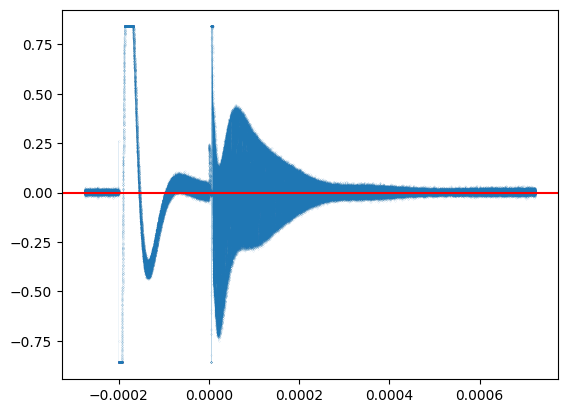

In [3]:
#plotting
plt.plot(x1,y1,'-o', linewidth=0.05, markersize=0.05)
plt.axhline(y=0, color='r', linestyle='-' )


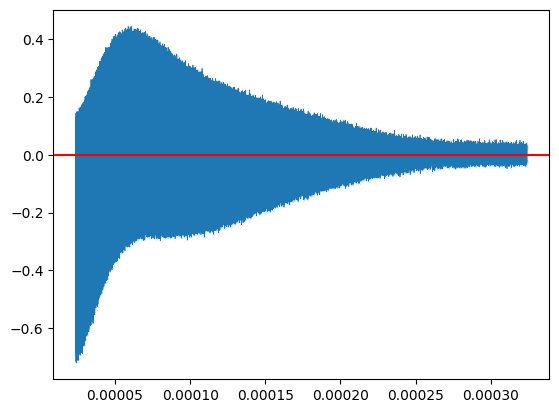

In [4]:
#ZOOOM plotting 
start = 30000
stop = 60000

plt.plot(x1[start:stop],y1[start:stop],'-o', linewidth=0.5, markersize=0.05)
plt.axhline(y=0, color='r', linestyle='-' )

In [5]:
!pip install bokeh

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [6]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

# Create a scatter plot
p = figure()

# Add scatter glyphs
p.scatter(x1[start:stop],y1[start:stop])

# Add hover tool with cursor coordinates
hover = HoverTool(tooltips=[('x', '@x'), ('y', '@y')])
p.add_tools(hover)

# Show plot
show(p)

In [7]:
#sampled points from the exponential decay
x_fit = np.array([6.707E-05,7.851E-05,8.962E-05,1.029E-04,1.148E-04,1.244E-04,1.362E-04,1.435E-04])*1.e6
y_fit = np.array([0.432,0.393,0.345,0.300,0.265,0.238,0.220,0.205])*1.e03

df_fit = pd.DataFrame({'time':x_fit, 'voltage': y_fit})
df_fit

,time,voltage
0,67.07,432.0
1,78.51,393.0
2,89.62,345.0
3,102.90,300.0
4,114.80,265.0
5,124.40,238.0
6,136.20,220.0
7,143.50,205.0


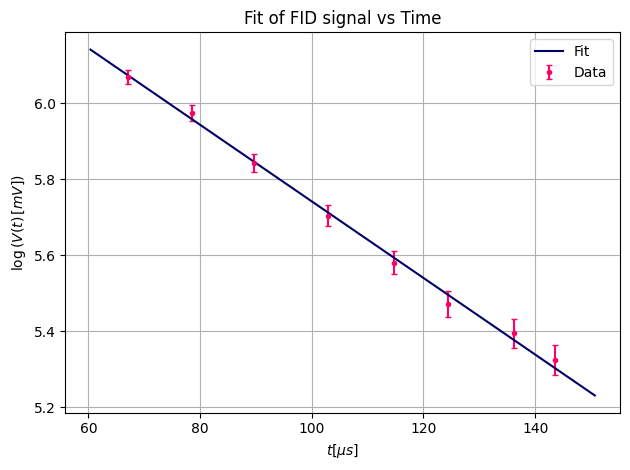

In [8]:
from scipy.optimize import curve_fit

y_lin = np.log(y_fit)
yerr=(1/y_fit)*(200/(10*np.sqrt(6)))
popt, pcov = curve_fit(lambda x,m,q: m*x+q ,x_fit, y_lin, sigma=yerr, absolute_sigma=True)

slope,q = popt
sigma_slope, sigma_q = np.sqrt(np.diag(pcov))
plt.errorbar(x_fit, y_lin, yerr=yerr, color="#FF0066", fmt=".", label='Data', capsize=2)
X=np.linspace(min(x_fit)*0.9, max(x_fit)*1.05, 50)
plt.plot(X, q + slope*X, color="#000066", label="Fit")

# Adding labels and legend
plt.title('Fit of FID signal vs Time')
plt.xlabel('$t [\mu s]$')
plt.ylabel('$\log\left( V(t) \, [mV] \\right)$')
plt.legend()
plt.grid()
plt.tight_layout()
# Displaying the plot
plt.show()

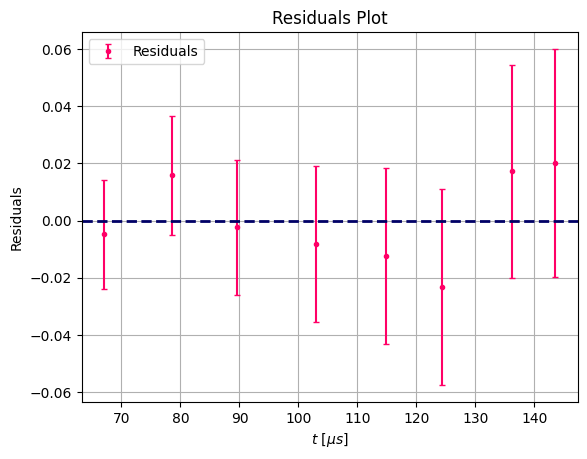

In [9]:
# Calculate residuals
residuals = y_lin - (q + slope * x_fit)

# Plotting residuals
plt.errorbar(x_fit, residuals, yerr=yerr, color="#FF0066", fmt=".", label='Residuals', capsize=2)
plt.axhline(y=0, color='#000066', linestyle='--', linewidth=2)  # Adding a horizontal line at y=0 for reference
plt.xlabel('$t$ [$\mu s$]')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
T2_star = -1/slope
err = (1/(slope**2))*sigma_slope
print("T2*: ", T2_star,  "+- ", err, "us")

T2*:  99.20850959052134 +-  3.7729449476989934 us


In [11]:
print(slope, sigma_slope)
print(q, sigma_q)

-0.01007978049592172 0.00038333865767131985
6.749321307869653 0.03730046821968878


In [12]:
(200/(10*np.sqrt(6)))

8.16496580927726